[link](http://cs231n.github.io/neural-networks-case-study/#grad)

In [1]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import print_helper

## Generating some data

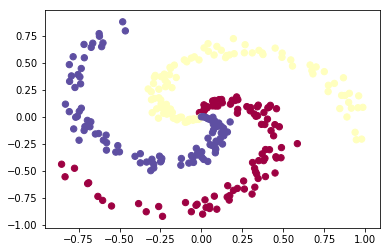

In [3]:
N = 100 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
X = np.zeros((N*K,D)) # data matrix (each row = single example)
y = np.zeros(N*K, dtype='uint8') # class labels
for j in xrange(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j
# lets visualize the data:
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.show()

The toy spiral data consists of three classes (blue, red, yellow) that are not linearly separable.

In [4]:
X.shape.p()
y.shape.p()
None

X.shape : (300, 2)
y.shape : (300,)


## Training a Softmax Linear Classifier

In [5]:
# initialize parameters randomly
W = 0.01 * np.random.randn(D,K)
b = np.zeros((1,K))
W.shape.p()
b.shape.p()
None

W.shape : (2, 3)
b.shape : (1, 3)


Since this is a linear classifier, we can compute all class scores very simply in parallel with a single matrix multiplication:



In [6]:
# compute class scores for a linear classifier
scores = np.dot(X, W) + b

In [7]:
scores.shape.p()
scores[0:3].p()
None

scores.shape : (300, 3)
scores[0:3] : [[  0.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  2.16632375e-04   6.49724659e-07  -1.10130443e-04]
 [  4.47483452e-04   3.70299220e-06  -1.61971201e-04]]


## Compute the loss

Softmax classifier

\begin{equation*}
L_i = -\log\left(\frac{e^{f_{y_i}}}{ \sum_j e^{f_j} }\right)
\end{equation*}

\begin{equation*}
L =  \underbrace{ \frac{1}{N} \sum_i L_i }_\text{data loss} + \underbrace{ \frac{1}{2} \lambda \sum_k\sum_l W_{k,l}^2 }_\text{regularization loss} \\\\
\end{equation*}

In [8]:
num_examples = X.shape[0]
# get unnormalized probabilities
exp_scores = np.exp(scores)
# normalize them for each example
probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)




In [9]:
probs.shape

(300, 3)

In [10]:
corect_logprobs = -np.log(probs[range(num_examples),y])
corect_logprobs.shape

(300,)

In [11]:
# compute the loss: average cross-entropy loss and regularization
reg = 1e-3
data_loss = np.sum(corect_logprobs)/num_examples
reg_loss = 0.5*reg*np.sum(W*W)
loss = data_loss + reg_loss

In [12]:
data_loss.p()
reg_loss.p()
loss.p()
None

data_loss : 1.10092589233
reg_loss : 3.2959542102e-07
loss : 1.10092622193


## Computing the Analytic Gradient with Backpropagation

Lets introduce the intermediate variable **p**, which is a vector of the (normalized) probabilities. The loss for one example is:

\begin{equation*}
p_k = \frac{e^{f_k}}{ \sum_j e^{f_j} } \hspace{1in} L_i =-\log\left(p_{y_i}\right)
\end{equation*}

\begin{equation*}
\frac{\partial L_i }{ \partial f_k } = p_k - \mathbb{1}(y_i = k)
\end{equation*}

Suppose the probabilities we computed were p = [0.2, 0.3, 0.5], and that the correct class was the middle one (with probability 0.3). According to this derivation the gradient on the scores would be df = [0.2, -0.7, 0.5].

Notice the other p did not change

In [13]:
dscores = probs
dscores.shape.p()
dscores[range(num_examples),y] -= 1
dscores /= num_examples

dscores.shape : (300, 3)


In [19]:
y.shape.p()
y

y.shape : (300,)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2], d

In [20]:
dW = np.dot(X.T, dscores)
db = np.sum(dscores, axis=0, keepdims=True)
dW += reg*W # don't forget the regularization gradient

## Performing a parameter update

In [22]:
step_size = 1e-0
# perform a parameter update
W += -step_size * dW
b += -step_size * db

In [23]:
step_size.p()
reg.p()

step_size : 1.0
reg : 0.001


0.001

## Putting it all together: Training a Softmax Classifier

In [27]:
#Train a Linear Classifier

# initialize parameters randomly
W = 0.01 * np.random.randn(D,K)
b = np.zeros((1,K))

# some hyperparameters
step_size = 1e-0
reg = 1e-3 # regularization strength

# gradient descent loop
num_examples = X.shape[0]
for i in xrange(20000):
  
  # evaluate class scores, [N x K]
  scores = np.dot(X, W) + b 
  
  # compute the class probabilities
  exp_scores = np.exp(scores)
  probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True) # [N x K]
  
  # compute the loss: average cross-entropy loss and regularization
  corect_logprobs = -np.log(probs[range(num_examples),y])
  data_loss = np.sum(corect_logprobs)/num_examples
  reg_loss = 0.5*reg*np.sum(W*W)
  loss = data_loss + reg_loss
  if i % 100 == 0:
    print "iteration %d: loss %f" % (i, loss)
  
  # compute the gradient on scores
  dscores = probs
  dscores[range(num_examples),y] -= 1
  dscores /= num_examples
  
  # backpropate the gradient to the parameters (W,b)
  dW = np.dot(X.T, dscores)
  db = np.sum(dscores, axis=0, keepdims=True)
  
  dW += reg*W # regularization gradient
  
  # perform a parameter update
  W += -step_size * dW
  b += -step_size * db

iteration 0: loss 1.101052
iteration 100: loss 0.753429
iteration 200: loss 0.750696
iteration 300: loss 0.750568
iteration 400: loss 0.750560
iteration 500: loss 0.750560
iteration 600: loss 0.750560
iteration 700: loss 0.750560
iteration 800: loss 0.750560
iteration 900: loss 0.750560
iteration 1000: loss 0.750560
iteration 1100: loss 0.750560
iteration 1200: loss 0.750560
iteration 1300: loss 0.750560
iteration 1400: loss 0.750560
iteration 1500: loss 0.750560
iteration 1600: loss 0.750560
iteration 1700: loss 0.750560
iteration 1800: loss 0.750560
iteration 1900: loss 0.750560
iteration 2000: loss 0.750560
iteration 2100: loss 0.750560
iteration 2200: loss 0.750560
iteration 2300: loss 0.750560
iteration 2400: loss 0.750560
iteration 2500: loss 0.750560
iteration 2600: loss 0.750560
iteration 2700: loss 0.750560
iteration 2800: loss 0.750560
iteration 2900: loss 0.750560
iteration 3000: loss 0.750560
iteration 3100: loss 0.750560
iteration 3200: loss 0.750560
iteration 3300: loss 0